# 2.1 EDA with GDP

## Exploratory Data Analysis on Population and Demography using Global GDP dataset

## We decided to use Global GDP Dataset  in order to add features to better predict demographical shifts.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
demographic_data = pd.read_csv("demographic.csv")
gdp_data = pd.read_csv("GDP by country 1999-2022.csv")

In [3]:
demographic_data.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 15 to 19 years,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,757113,1241348,909953,661807,467170,271905,92691,9499,123,0.0
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,768616,1260904,922765,667015,468881,273286,94358,10155,118,0.0
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,781411,1280288,935638,672491,470898,274852,96026,10721,139,0.0
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,794308,1298803,948321,678064,472969,276577,97705,11254,166,0.0
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,806216,1316768,961484,684153,475117,278210,99298,11793,190,0.0


In [4]:
gdp_data.head()

,Country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Rep. of.",0,0,0,4.084,4.585,5.971,7.309,8.399,9.892,...,21.555,24.304,0,0,0,0,0,0,0,0
1,Albania,3.444,3.695,4.096,4.456,5.6,7.452,8.376,9.133,10.163,...,14.91,16.053,11.591,12.204,13.214,14.341,15.553,16.996,16.77,18.012
2,Algeria,48.845,54.749,55.181,57.053,68.013,85.016,102.38,114.322,116.158,...,190.432,203.449,175.077,181.71,192.256,202.179,210.906,219.16,163.812,168.195
3,Angola,6.153,9.135,8.936,11.386,13.956,19.8,30.632,43.759,55.37,...,136.415,151.089,102.011,98.815,105.369,112.533,119.403,127.15,70.339,74.953
4,Antigua and Barbuda,0.652,0.678,0.71,0.718,0.754,0.818,0.875,0.962,1.026,...,1.404,1.494,1.285,1.328,1.386,1.458,1.536,1.617,1.405,1.534


## Data Cleaning 1

1. Standardise country names (e.g., "Afghanistan, Rep. of." will become "Afghanistan")
2. Reshape GDP data from wide to long format (its just easier to merge the data afterwards)
3. merge the data indexing with country and year

# ...

In [5]:
# Standardizing country names in GDP data
gdp_data['Country'] = gdp_data['Country'].str.replace(r" \(.*\)|, Rep. of\.", "", regex=True)

In [6]:
# Reshape GDP data from wide to long format
gdp_long = pd.melt(gdp_data, id_vars='Country', var_name='Year', value_name='GDP')
gdp_long['Year'] = gdp_long['Year'].astype(int)  # Convert year to integer for merging

In [7]:
gdp_long.head()

,Country,Year,GDP
0,Afghanistan,1999,0
1,Albania,1999,3.444
2,Algeria,1999,48.845
3,Angola,1999,6.153
4,Antigua and Barbuda,1999,0.652


In [8]:
# Merge demographic and GDP data on 'Country' and 'Year'
combined_data = pd.merge(demographic_data, gdp_long, how='left', left_on=['Country name', 'Year'], right_on=['Country', 'Year'])

combined_data.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,Country,GDP
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,909953,661807,467170,271905,92691,9499,123,0.0,NaN,NaN
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,922765,667015,468881,273286,94358,10155,118,0.0,NaN,NaN
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,935638,672491,470898,274852,96026,10721,139,0.0,NaN,NaN
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,948321,678064,472969,276577,97705,11254,166,0.0,NaN,NaN
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,961484,684153,475117,278210,99298,11793,190,0.0,NaN,NaN


In [9]:
# Dropping the extra 'Country' column from GDP data
combined_data.drop('Country', axis=1, inplace=True)

# Check for missing values
missing_data_summary = combined_data.isna().sum()

# Display the first few rows of the merged dataset and the missing data summary
combined_data.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 20 to 29 years,Population aged 30 to 39 years,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,GDP
0,Afghanistan,1950,7480464,301735.0,1248282,3068855,4494349,4198587,4411609,3946595,...,1241348,909953,661807,467170,271905,92691,9499,123,0.0,NaN
1,Afghanistan,1951,7571542,299368.0,1246857,3105444,4552138,4250002,4466098,3993640,...,1260904,922765,667015,468881,273286,94358,10155,118,0.0,NaN
2,Afghanistan,1952,7667534,305393.0,1248220,3145070,4613604,4303436,4522464,4041439,...,1280288,935638,672491,470898,274852,96026,10721,139,0.0,NaN
3,Afghanistan,1953,7764549,311574.0,1254725,3186382,4676232,4356242,4578167,4088379,...,1298803,948321,678064,472969,276577,97705,11254,166,0.0,NaN
4,Afghanistan,1954,7864289,317584.0,1267817,3231060,4741371,4408474,4633229,4136116,...,1316768,961484,684153,475117,278210,99298,11793,190,0.0,NaN


In [10]:
missing_data_summary

Country name                                      0
Year                                              0
Population                                        0
Population of children under the age of 1         0
Population of children under the age of 5         0
Population of children under the age of 15        0
Population under the age of 25                    0
Population aged 15 to 64 years                    0
Population older than 15 years                    0
Population older than 18 years                    0
Population at age 1                               0
Population aged 1 to 4 years                      0
Population aged 5 to 9 years                      0
Population aged 10 to 14 years                    0
Population aged 15 to 19 years                    0
Population aged 20 to 29 years                    0
Population aged 30 to 39 years                    0
Population aged 40 to 49 years                    0
Population aged 50 to 59 years                    0
Population a

## Explanation on missing data

### There are 14834 missing datapoints for GDP. This is because gdp_data only has data points from 1999 to 2022 while demographic_data has data points from 1950 to 2021.

## Data Cleaning 2 & Feature-creation

1. Completely remove the years which dont have GDP value.
2. Calculate GDP per capita. This is done by dividing the GDP(in billions) by the total population for each country and year (this is in USD)
3. Calculate population growth rate for each country for each year

In [11]:
# Filter the data to the years 1999-2022 where we have GDP data
filtered_data = combined_data[(combined_data['Year'] >= 1999) & (combined_data['Year'] <= 2022)]

# Convert GDP to numeric, forcing errors to NaN to handle any non-numeric entries
filtered_data['GDP'] = pd.to_numeric(filtered_data['GDP'], errors='coerce')

# Calculate GDP per capita (in USD)
filtered_data['GDP Per Capita'] = filtered_data['GDP'] * 1e9 / filtered_data['Population']

# Calculate Population Growth Rate
filtered_data = filtered_data.sort_values(by=['Country name', 'Year'])
filtered_data['Population Growth Rate'] = filtered_data.groupby('Country name')['Population'].pct_change() * 100

# Recheck for missing values
updated_missing_data_summary = filtered_data.isna().sum()
filtered_data.groupby('Country name')['Country name'].count()

C:\Users\marvy\AppData\Local\Temp\ipykernel_8828\2446996094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['GDP'] = pd.to_numeric(filtered_data['GDP'], errors='coerce')
C:\Users\marvy\AppData\Local\Temp\ipykernel_8828\2446996094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['GDP Per Capita'] = filtered_data['GDP'] * 1e9 / filtered_data['Population']


Country name
Afghanistan       23
Africa (UN)       23
Albania           23
Algeria           23
American Samoa    23
                  ..
Western Sahara    23
World             23
Yemen             23
Zambia            23
Zimbabwe          23
Name: Country name, Length: 254, dtype: int64

In [12]:
filtered_data.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,GDP,GDP Per Capita,Population Growth Rate
49,Afghanistan,1999,19262854,895539.0,4005677,9538093,13136494,9284534,9724752,8519511,...,1243174,861139,491689,198751,36187,1619,8.0,0.000,0.000000,NaN
50,Afghanistan,2000,19542986,898809.0,4044487,9716430,13343836,9380030,9826547,8606509,...,1256153,861541,495073,202165,37212,1674,9.0,0.000,0.000000,1.454260
51,Afghanistan,2001,19688634,894038.0,4046425,9817924,13458009,9420852,9870699,8634748,...,1263743,854291,494970,204078,38010,1721,10.0,0.000,0.000000,0.745270
52,Afghanistan,2002,21000258,941149.0,4280854,10488288,14365919,10031304,10511959,9179506,...,1346252,899545,524785,218247,41164,1879,11.0,4.084,194.473801,6.661833
53,Afghanistan,2003,22645136,999679.0,4574403,11313832,15499313,10811842,11331293,9877464,...,1451498,958962,563715,236002,45091,2075,11.0,4.585,202.471736,7.832656


In [13]:
updated_missing_data_summary

Country name                                     0
Year                                             0
Population                                       0
Population of children under the age of 1        0
Population of children under the age of 5        0
Population of children under the age of 15       0
Population under the age of 25                   0
Population aged 15 to 64 years                   0
Population older than 15 years                   0
Population older than 18 years                   0
Population at age 1                              0
Population aged 1 to 4 years                     0
Population aged 5 to 9 years                     0
Population aged 10 to 14 years                   0
Population aged 15 to 19 years                   0
Population aged 20 to 29 years                   0
Population aged 30 to 39 years                   0
Population aged 40 to 49 years                   0
Population aged 50 to 59 years                   0
Population aged 60 to 69 years 

## Further explanation on missing data

#### 1. Some years and probably some countries aren't included in the gdp_data so we're missing 2642 data points for GDP and GDP Per Capita.

#### 2. Population Growth Rate is missing 254 values which is exactly the number of countries. This implies that the missing value is simply the starting year (1999) where there is no preceding data to calculate population growth rate

## Data cleaning 3!

### for the 2642 missing values:
1. Simply remove countries with 100% missing GDP data
2. interpolation for sporadically missing years

potentially external data for missing rows... could possibly be an improvement

In [14]:
# Analyse how many years of GDP data are missing for each country
missing_gdp_by_country = filtered_data.groupby('Country name')['GDP'].apply(lambda x: x.isna().sum())

# Analyse the total number of years available for each country in the dataset
total_years_by_country = filtered_data.groupby('Country name').size()

# Calculate the percentage of missing GDP data for each country
missing_gdp_percentage = (missing_gdp_by_country / total_years_by_country) * 100

# Display the summary of missing GDP data by country
missing_gdp_summary = pd.DataFrame({
    'Total Years': total_years_by_country,
    'Missing GDP Years': missing_gdp_by_country,
    'Missing GDP Percentage': missing_gdp_percentage
})

missing_gdp_summary.sort_values(by='Missing GDP Percentage', ascending=False).head()

,Total Years,Missing GDP Years,Missing GDP Percentage
Country name,,,
"Less developed regions, excluding least developed countries",23,23,100.0
San Marino,23,23,100.0
Japan,23,23,100.0
Saint Barthelemy,23,23,100.0
Italy,23,23,100.0


In [15]:
# Exclude countries with 100% missing GDP data
countries_to_exclude = missing_gdp_summary[missing_gdp_summary['Missing GDP Percentage'] == 100].index
filtered_data_excluded = filtered_data[~filtered_data['Country name'].isin(countries_to_exclude)]

In [16]:
# Step 1: Replace zeros with NaNs for GDP
filtered_data_excluded['GDP'] = filtered_data_excluded['GDP'].replace(0, pd.NA)

# Step 2: Perform linear interpolation to fill NaNs, ensuring the index is maintained
filtered_data_excluded['GDP'] = filtered_data_excluded.groupby('Country name')['GDP'].transform(lambda x: x.interpolate(method='linear'))

# Step 3: Backfill or forward fill if there are still NaNs at the edges
filtered_data_excluded['GDP'] = filtered_data_excluded.groupby('Country name')['GDP'].transform(lambda x: x.bfill().ffill())

# Check remaining missing GDP values
remaining_missing_gdp = filtered_data_excluded['GDP'].isna().sum()

C:\Users\marvy\AppData\Local\Temp\ipykernel_8828\3900203966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_excluded['GDP'] = filtered_data_excluded['GDP'].replace(0, pd.NA)
C:\Users\marvy\AppData\Local\Temp\ipykernel_8828\3900203966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_excluded['GDP'] = filtered_data_excluded.groupby('Country name')['GDP'].transform(lambda x: x.interpolate(method='linear'))
C:\Users\marvy\AppData\Local\Temp\ipykernel_8828\3900203966.py:8: Sett

In [17]:
print("Remaining missing GDP after handling zeros:", remaining_missing_gdp) # YIPPEE!!

Remaining missing GDP after handling zeros: 0


In [18]:
filtered_data_excluded.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 40 to 49 years,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,GDP,GDP Per Capita,Population Growth Rate
49,Afghanistan,1999,19262854,895539.0,4005677,9538093,13136494,9284534,9724752,8519511,...,1243174,861139,491689,198751,36187,1619,8.0,4.084,0.000000,NaN
50,Afghanistan,2000,19542986,898809.0,4044487,9716430,13343836,9380030,9826547,8606509,...,1256153,861541,495073,202165,37212,1674,9.0,4.084,0.000000,1.454260
51,Afghanistan,2001,19688634,894038.0,4046425,9817924,13458009,9420852,9870699,8634748,...,1263743,854291,494970,204078,38010,1721,10.0,4.084,0.000000,0.745270
52,Afghanistan,2002,21000258,941149.0,4280854,10488288,14365919,10031304,10511959,9179506,...,1346252,899545,524785,218247,41164,1879,11.0,4.084,194.473801,6.661833
53,Afghanistan,2003,22645136,999679.0,4574403,11313832,15499313,10811842,11331293,9877464,...,1451498,958962,563715,236002,45091,2075,11.0,4.585,202.471736,7.832656


# Feature Creation: GDP Growth Rate

## Recalculate some previous features.

## Calculate GDP growth rate for each country for each year

In [19]:
# Calculate GDP per capita (in USD)
filtered_data_excluded['GDP Per Capita'] = filtered_data_excluded['GDP'] * 1e9 / filtered_data_excluded['Population']

# Calculate Population Growth Rate
filtered_data_excluded = filtered_data_excluded.sort_values(by=['Country name', 'Year'])
filtered_data_excluded['Population Growth Rate'] = filtered_data_excluded.groupby('Country name')['Population'].pct_change() * 100

C:\Users\marvy\AppData\Local\Temp\ipykernel_8828\2698231254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_excluded['GDP Per Capita'] = filtered_data_excluded['GDP'] * 1e9 / filtered_data_excluded['Population']


In [20]:
# Calculate GDP Growth Rate
filtered_data_excluded['GDP Growth Rate'] = filtered_data_excluded.groupby('Country name')['GDP'].pct_change() * 100

filtered_data_excluded['GDP Growth Rate'] = filtered_data_excluded['GDP Growth Rate'].fillna(0)

# Display the first few rows to check the calculations
print(filtered_data_excluded[['Country name', 'Year', 'GDP', 'GDP Per Capita', 'GDP Growth Rate']].head())

   Country name  Year    GDP  GDP Per Capita  GDP Growth Rate
49  Afghanistan  1999  4.084      212.014274         0.000000
50  Afghanistan  2000  4.084      208.975230         0.000000
51  Afghanistan  2001  4.084      207.429322         0.000000
52  Afghanistan  2002  4.084      194.473801         0.000000
53  Afghanistan  2003  4.585      202.471736        12.267385


In [21]:
print(filtered_data_excluded.columns)

Index(['Country name', 'Year', 'Population',
       'Population of children under the age of 1',
       'Population of children under the age of 5',
       'Population of children under the age of 15',
       'Population under the age of 25', 'Population aged 15 to 64 years',
       'Population older than 15 years', 'Population older than 18 years',
       'Population at age 1', 'Population aged 1 to 4 years',
       'Population aged 5 to 9 years', 'Population aged 10 to 14 years',
       'Population aged 15 to 19 years', 'Population aged 20 to 29 years',
       'Population aged 30 to 39 years', 'Population aged 40 to 49 years',
       'Population aged 50 to 59 years', 'Population aged 60 to 69 years',
       'Population aged 70 to 79 years', 'Population aged 80 to 89 years',
       'Population aged 90 to 99 years', 'Population older than 100 years',
       'GDP', 'GDP Per Capita', 'Population Growth Rate', 'GDP Growth Rate'],
      dtype='object')


In [22]:
filtered_data_excluded.head()

,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,Population aged 50 to 59 years,Population aged 60 to 69 years,Population aged 70 to 79 years,Population aged 80 to 89 years,Population aged 90 to 99 years,Population older than 100 years,GDP,GDP Per Capita,Population Growth Rate,GDP Growth Rate
49,Afghanistan,1999,19262854,895539.0,4005677,9538093,13136494,9284534,9724752,8519511,...,861139,491689,198751,36187,1619,8.0,4.084,212.014274,NaN,0.000000
50,Afghanistan,2000,19542986,898809.0,4044487,9716430,13343836,9380030,9826547,8606509,...,861541,495073,202165,37212,1674,9.0,4.084,208.975230,1.454260,0.000000
51,Afghanistan,2001,19688634,894038.0,4046425,9817924,13458009,9420852,9870699,8634748,...,854291,494970,204078,38010,1721,10.0,4.084,207.429322,0.745270,0.000000
52,Afghanistan,2002,21000258,941149.0,4280854,10488288,14365919,10031304,10511959,9179506,...,899545,524785,218247,41164,1879,11.0,4.084,194.473801,6.661833,0.000000
53,Afghanistan,2003,22645136,999679.0,4574403,11313832,15499313,10811842,11331293,9877464,...,958962,563715,236002,45091,2075,11.0,4.585,202.471736,7.832656,12.267385


## Visualization just for fun

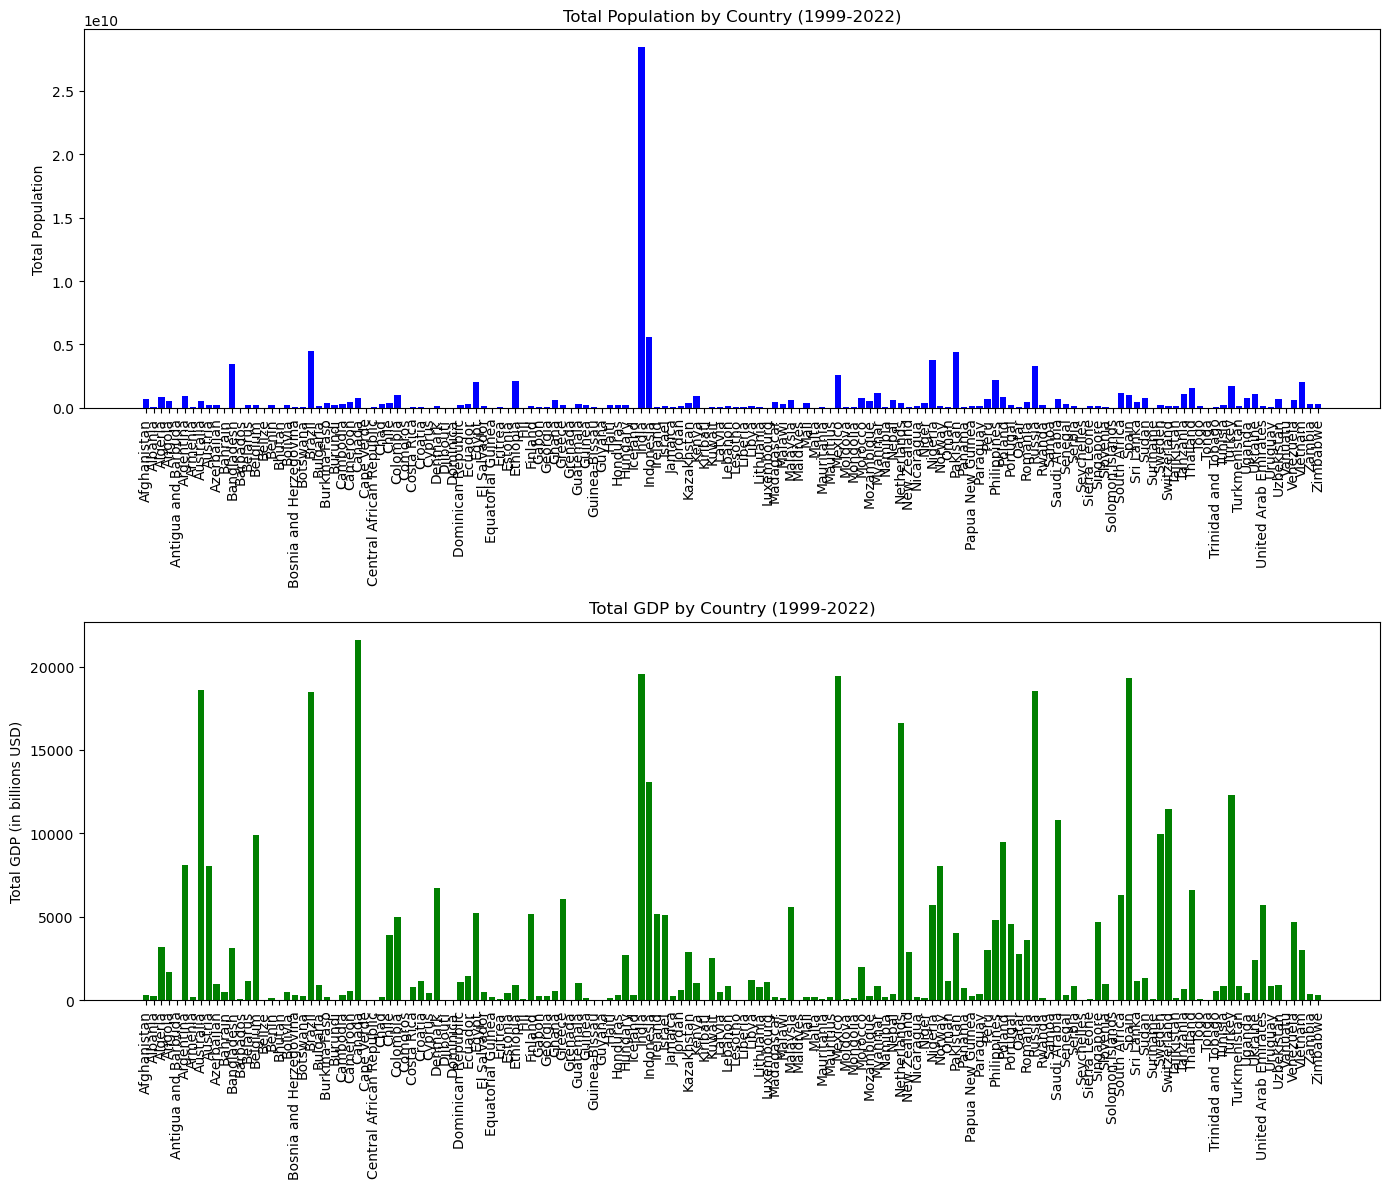

In [23]:
# Plot population by country (sum of population over the years for simplification)
population_by_country = filtered_data_excluded.groupby('Country name')['Population'].sum().sort_index()

# Plot GDP by country (sum of GDP over the years for simplification)
# We understand this is horrible visualisation for accuracy relating GDP and country when visualised against population and country
gdp_by_country = filtered_data_excluded.groupby('Country name')['GDP'].sum().sort_index()

# Creating the plots
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Population plot
ax[0].bar(population_by_country.index, population_by_country.values, color='blue')
ax[0].set_title('Total Population by Country (1999-2022)')
ax[0].set_ylabel('Total Population')
ax[0].tick_params(axis='x', rotation=90)

# GDP plot
ax[1].bar(gdp_by_country.index, gdp_by_country.values, color='green')
ax[1].set_title('Total GDP by Country (1999-2022)')
ax[1].set_ylabel('Total GDP (in billions USD)')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

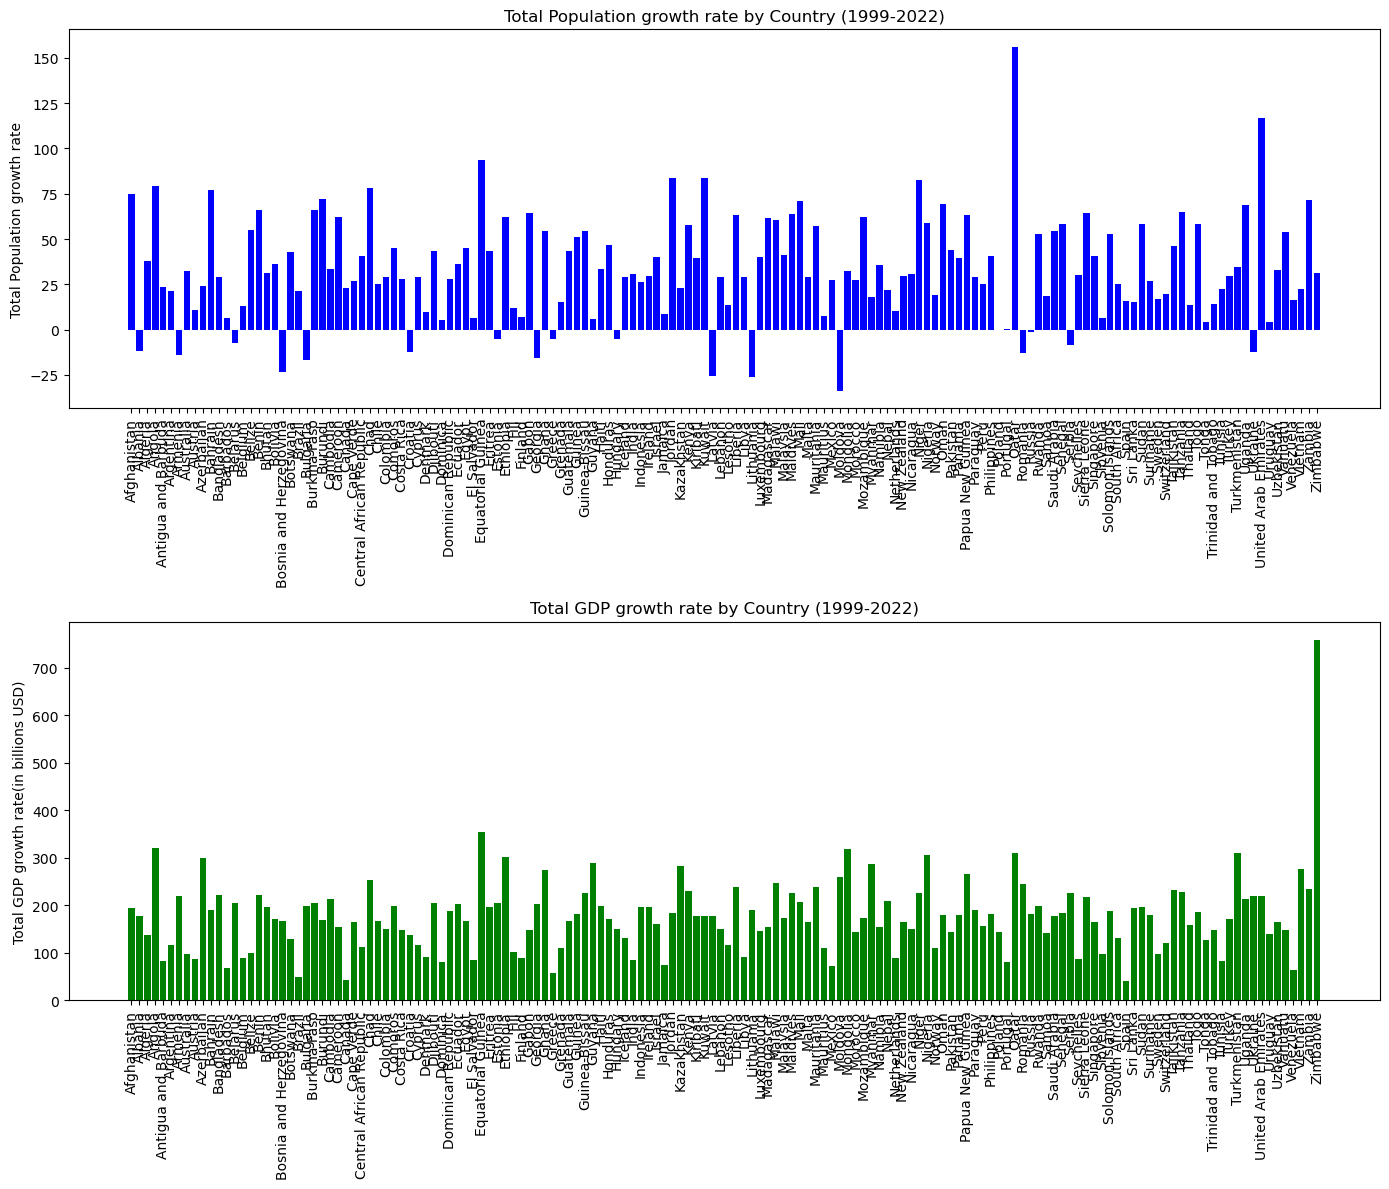

In [24]:
# Plot population by country (sum of population over the years for simplification)
population_by_country = filtered_data_excluded.groupby('Country name')['Population Growth Rate'].sum().sort_index()

# Plot GDP by country (sum of GDP over the years for simplification)
# We understand this is horrible visualisation for accuracy relating GDP and country when visualised against population and country
gdp_by_country = filtered_data_excluded.groupby('Country name')['GDP Growth Rate'].sum().sort_index()

# Creating the plots
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Population plot
ax[0].bar(population_by_country.index, population_by_country.values, color='blue')
ax[0].set_title('Total Population growth rate by Country (1999-2022)')
ax[0].set_ylabel('Total Population growth rate')
ax[0].tick_params(axis='x', rotation=90)

# GDP plot
ax[1].bar(gdp_by_country.index, gdp_by_country.values, color='green')
ax[1].set_title('Total GDP growth rate by Country (1999-2022)')
ax[1].set_ylabel('Total GDP growth rate(in billions USD)')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# TIME FOR EDA!

## 1. Statistical summary

In [25]:
# Generate descriptive statistics for relevant variables
statistical_summary = filtered_data_excluded[['GDP', 'GDP Growth Rate', 'Population', 'GDP Per Capita', 'Population Growth Rate']].describe()
print(statistical_summary)

               GDP  GDP Growth Rate    Population  GDP Per Capita  \
count  3450.000000      3450.000000  3.450000e+03     3450.000000   
mean    123.376540         7.705121  3.003887e+07    10042.345562   
std     220.616391        14.799809  1.067012e+08    16322.523285   
min       0.045000       -94.359048  6.817100e+04       86.723898   
25%       5.555750         0.924480  2.651624e+06      960.222941   
50%      21.843500         6.583377  8.143016e+06     3686.374125   
75%     126.119000        11.369253  2.296097e+07    10535.237316   
max     993.908000       244.833434  1.407564e+09   131029.358860   

       Population Growth Rate  
count             3300.000000  
mean                 1.505063  
std                  1.637375  
min                 -5.142987  
25%                  0.573804  
50%                  1.374834  
75%                  2.368058  
max                 21.362200  


## 2. Correlation analysis

In [26]:
# Calculate the Pearson correlation coefficients
correlation_matrix = filtered_data_excluded[['GDP', 'GDP Growth Rate', 'Population', 'GDP Per Capita', 'Population Growth Rate']].corr()
print(correlation_matrix)

                             GDP  GDP Growth Rate  Population  GDP Per Capita  \
GDP                     1.000000        -0.083132    0.430584        0.373732   
GDP Growth Rate        -0.083132         1.000000   -0.021845       -0.052613   
Population              0.430584        -0.021845    1.000000       -0.102396   
GDP Per Capita          0.373732        -0.052613   -0.102396        1.000000   
Population Growth Rate -0.136281         0.086058   -0.006180       -0.037429   

                        Population Growth Rate  
GDP                                  -0.136281  
GDP Growth Rate                       0.086058  
Population                           -0.006180  
GDP Per Capita                       -0.037429  
Population Growth Rate                1.000000  


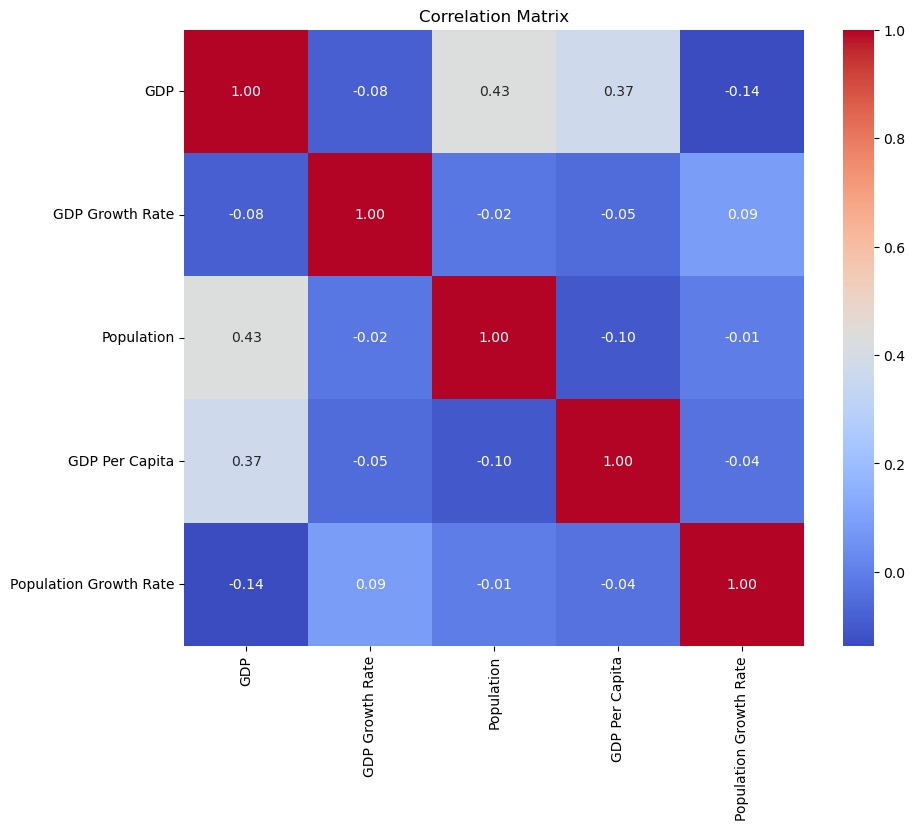

In [27]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

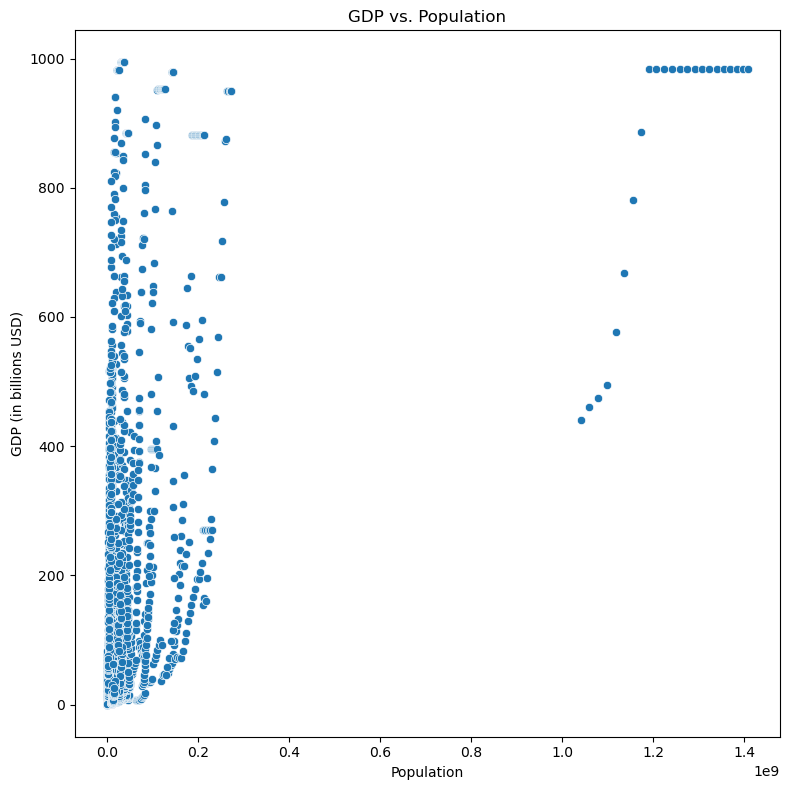

In [28]:
# Setting up the matplotlib figure
plt.figure(figsize=(8, 8))

# Scatter plot of GDP vs. Population
sb.scatterplot(x='Population', y='GDP', data=filtered_data_excluded)
plt.title('GDP vs. Population')
plt.xlabel('Population')
plt.ylabel('GDP (in billions USD)')

plt.tight_layout()
plt.show()

## We can see that GDP has intermediate positive correlation with Population. We will proceed to split the population into separate age groups, more specifically dependency ratios which was mentioned in our first run of EDA. this allows us to analyse the relation between GDP and the demographics of a population.

In [29]:
print(filtered_data_excluded.columns)

Index(['Country name', 'Year', 'Population',
       'Population of children under the age of 1',
       'Population of children under the age of 5',
       'Population of children under the age of 15',
       'Population under the age of 25', 'Population aged 15 to 64 years',
       'Population older than 15 years', 'Population older than 18 years',
       'Population at age 1', 'Population aged 1 to 4 years',
       'Population aged 5 to 9 years', 'Population aged 10 to 14 years',
       'Population aged 15 to 19 years', 'Population aged 20 to 29 years',
       'Population aged 30 to 39 years', 'Population aged 40 to 49 years',
       'Population aged 50 to 59 years', 'Population aged 60 to 69 years',
       'Population aged 70 to 79 years', 'Population aged 80 to 89 years',
       'Population aged 90 to 99 years', 'Population older than 100 years',
       'GDP', 'GDP Per Capita', 'Population Growth Rate', 'GDP Growth Rate'],
      dtype='object')


In [30]:
# Calculate Elderly Population as the sum of populations aged 70 and older
filtered_data_excluded['Population aged 65 and older'] = (
    filtered_data_excluded['Population']
    - filtered_data_excluded['Population aged 15 to 64 years']
    - filtered_data_excluded['Population of children under the age of 15']
)

# Total Dependency Ratio
filtered_data_excluded['Total Dependency Ratio'] = (
    (filtered_data_excluded['Population of children under the age of 15'] + filtered_data_excluded['Population aged 65 and older']) /
    filtered_data_excluded['Population aged 15 to 64 years']
)

# Child Dependency Ratio
filtered_data_excluded['Child Dependency Ratio'] = (
    filtered_data_excluded['Population of children under the age of 15'] /
    filtered_data_excluded['Population aged 15 to 64 years']
)

# Old Age Dependency Ratio
filtered_data_excluded['Elderly Dependency Ratio'] = (
    filtered_data_excluded['Population aged 65 and older']/
    filtered_data_excluded['Population aged 15 to 64 years']
)

# Display the first few rows to verify the calculations
filtered_data_excluded[['Country name', 'Year', 'Total Dependency Ratio', 'Child Dependency Ratio', 'Elderly Dependency Ratio']].head()

,Country name,Year,Total Dependency Ratio,Child Dependency Ratio,Elderly Dependency Ratio
49,Afghanistan,1999,1.074725,1.027310,0.047415
50,Afghanistan,2000,1.083467,1.035863,0.047604
51,Afghanistan,2001,1.089900,1.042148,0.047751
52,Afghanistan,2002,1.093472,1.045556,0.047917
53,Afghanistan,2003,1.094475,1.046430,0.048046


In [31]:
# Calculate Total Dependency Ratio Growth Rate
filtered_data_excluded = filtered_data_excluded.sort_values(by=['Country name', 'Year'])
filtered_data_excluded['TDR Growth Rate'] = filtered_data_excluded.groupby('Country name')['Total Dependency Ratio'].pct_change() * 100

In [32]:
print(filtered_data_excluded.columns)

Index(['Country name', 'Year', 'Population',
       'Population of children under the age of 1',
       'Population of children under the age of 5',
       'Population of children under the age of 15',
       'Population under the age of 25', 'Population aged 15 to 64 years',
       'Population older than 15 years', 'Population older than 18 years',
       'Population at age 1', 'Population aged 1 to 4 years',
       'Population aged 5 to 9 years', 'Population aged 10 to 14 years',
       'Population aged 15 to 19 years', 'Population aged 20 to 29 years',
       'Population aged 30 to 39 years', 'Population aged 40 to 49 years',
       'Population aged 50 to 59 years', 'Population aged 60 to 69 years',
       'Population aged 70 to 79 years', 'Population aged 80 to 89 years',
       'Population aged 90 to 99 years', 'Population older than 100 years',
       'GDP', 'GDP Per Capita', 'Population Growth Rate', 'GDP Growth Rate',
       'Population aged 65 and older', 'Total Dependency Rat

In [33]:
# Calculate the correlation matrix including GDP and dependency ratios and population growth rates
correlation_matrix = filtered_data_excluded[['GDP', 'GDP Growth Rate','Total Dependency Ratio', 'TDR Growth Rate', 'Child Dependency Ratio', 'Elderly Dependency Ratio','Population', 'Population Growth Rate']].corr()
print(correlation_matrix)

                               GDP  GDP Growth Rate  Total Dependency Ratio  \
GDP                       1.000000        -0.083132               -0.317382   
GDP Growth Rate          -0.083132         1.000000                0.058864   
Total Dependency Ratio   -0.317382         0.058864                1.000000   
TDR Growth Rate           0.200967        -0.119801               -0.046149   
Child Dependency Ratio   -0.368560         0.080190                0.953504   
Elderly Dependency Ratio  0.338855        -0.097848               -0.453198   
Population                0.430584        -0.021845               -0.021917   
Population Growth Rate   -0.136281         0.086058                0.353058   

                          TDR Growth Rate  Child Dependency Ratio  \
GDP                              0.200967               -0.368560   
GDP Growth Rate                 -0.119801                0.080190   
Total Dependency Ratio          -0.046149                0.953504   
TDR Growth R

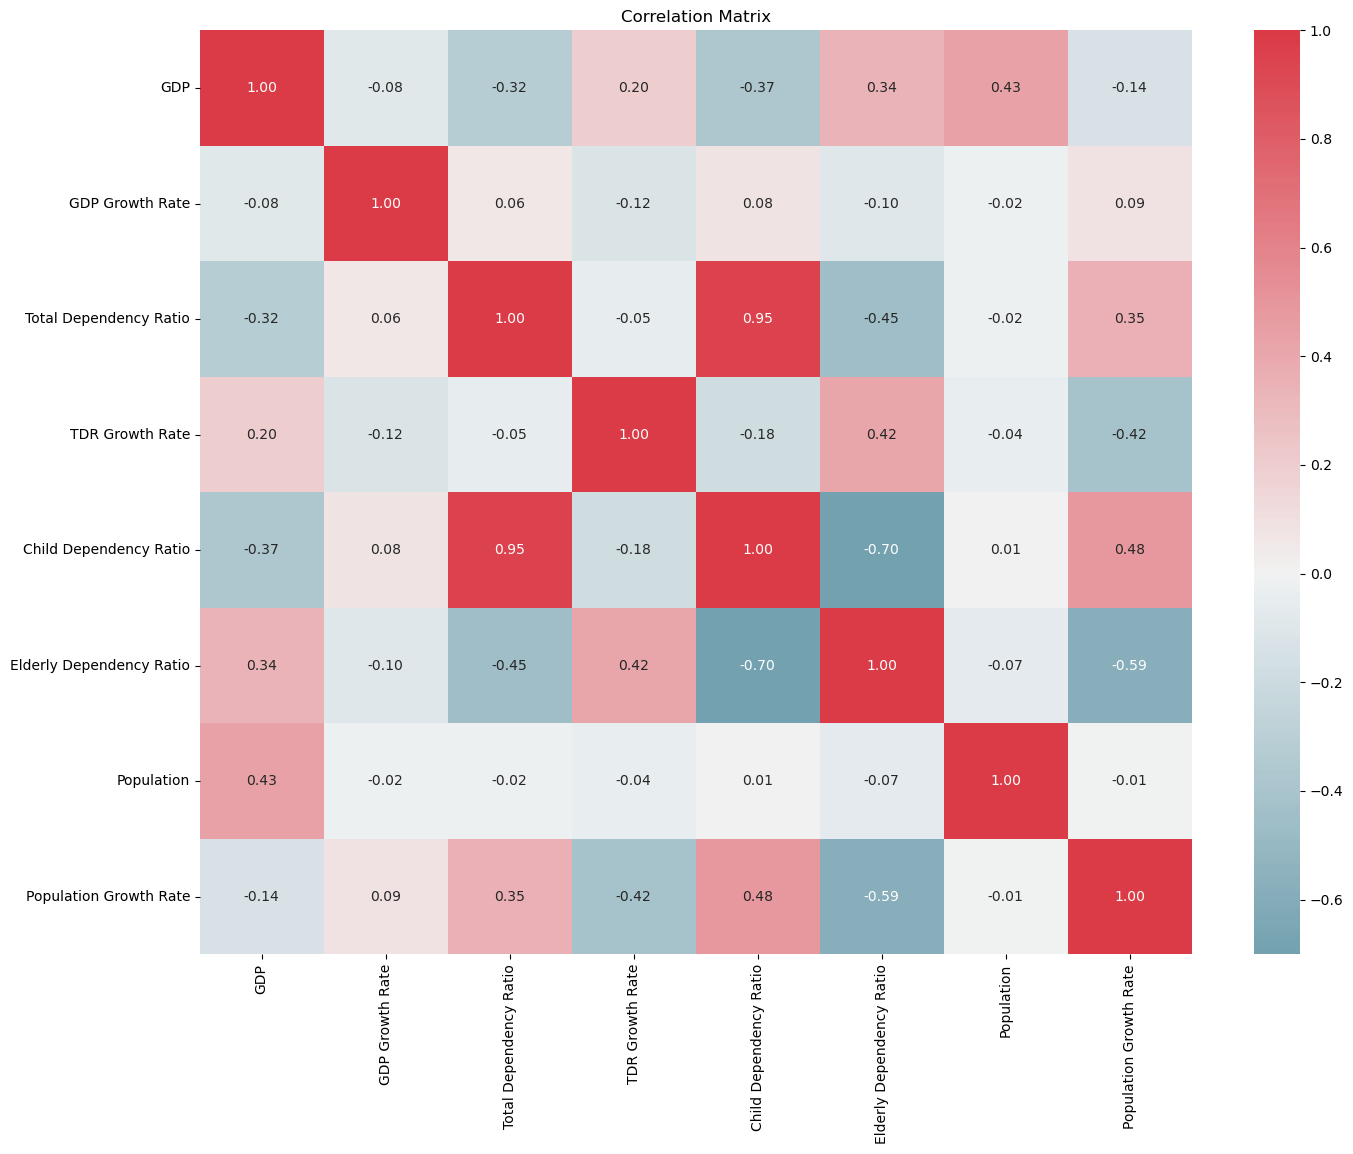

In [34]:
plt.figure(figsize=(16, 12))
cmap = sb.diverging_palette(220, 10, as_cmap=True, center="light")
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, center=0)
plt.title('Correlation Matrix')
plt.show()

In [35]:
# Adding in Elderly and Child Dependency Ratio Growth Rates as well!

# elderly
filtered_data_excluded = filtered_data_excluded.sort_values(by=['Country name', 'Year'])
filtered_data_excluded['EDR Growth Rate'] = filtered_data_excluded.groupby('Country name')['Elderly Dependency Ratio'].pct_change() * 100

#child
filtered_data_excluded = filtered_data_excluded.sort_values(by=['Country name', 'Year'])
filtered_data_excluded['CDR Growth Rate'] = filtered_data_excluded.groupby('Country name')['Child Dependency Ratio'].pct_change() * 100

In [36]:
correlation_matrix = filtered_data_excluded[['GDP', 'GDP Growth Rate', 'TDR Growth Rate', 'EDR Growth Rate', 'CDR Growth Rate', 'Population Growth Rate']].corr()
print(correlation_matrix)

                             GDP  GDP Growth Rate  TDR Growth Rate  \
GDP                     1.000000        -0.083132         0.200967   
GDP Growth Rate        -0.083132         1.000000        -0.119801   
TDR Growth Rate         0.200967        -0.119801         1.000000   
EDR Growth Rate         0.172337        -0.101139         0.515010   
CDR Growth Rate         0.116009        -0.098279         0.916199   
Population Growth Rate -0.136281         0.086058        -0.416599   

                        EDR Growth Rate  CDR Growth Rate  \
GDP                            0.172337         0.116009   
GDP Growth Rate               -0.101139        -0.098279   
TDR Growth Rate                0.515010         0.916199   
EDR Growth Rate                1.000000         0.313910   
CDR Growth Rate                0.313910         1.000000   
Population Growth Rate        -0.459603        -0.223272   

                        Population Growth Rate  
GDP                                  -0

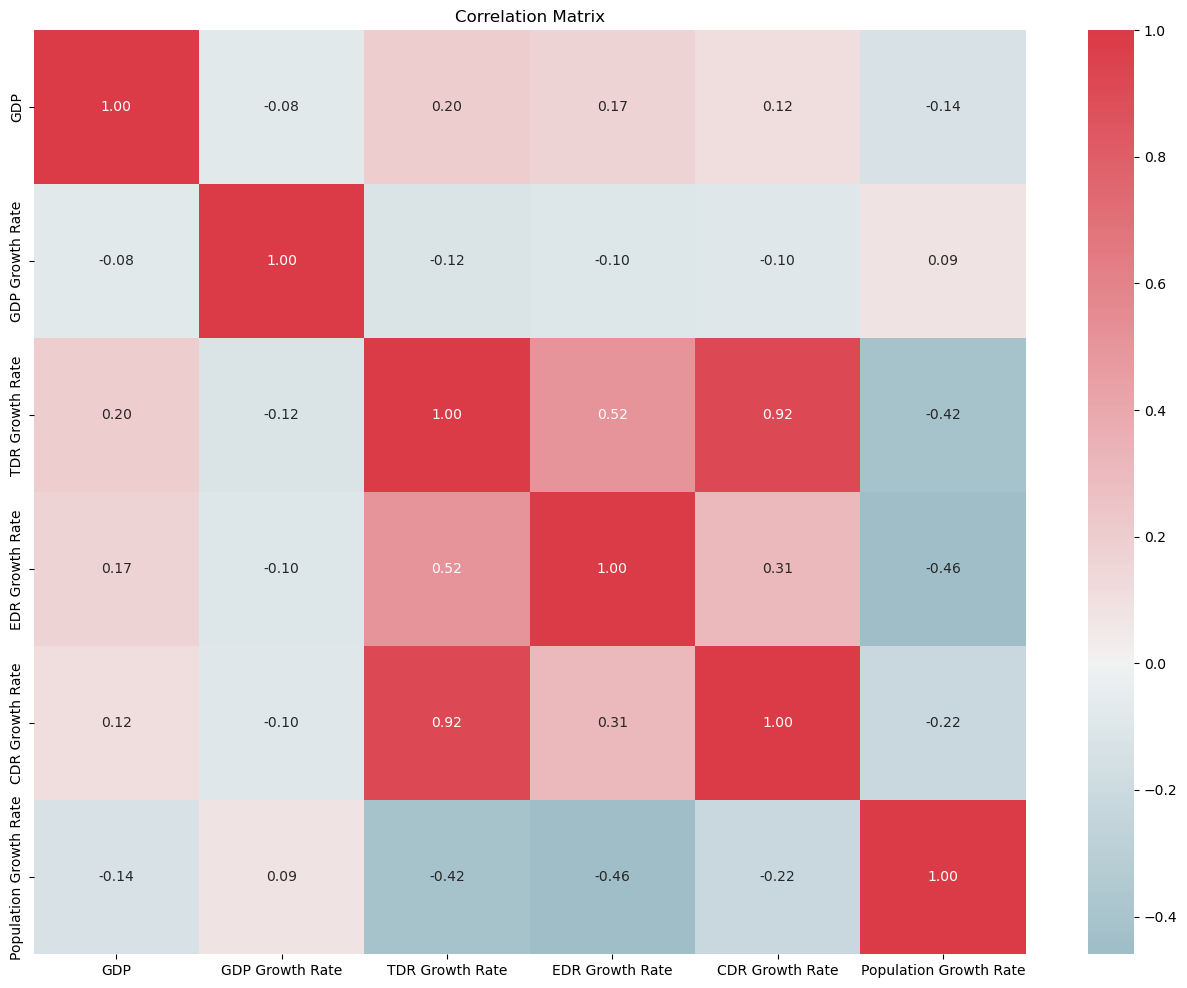

In [37]:
plt.figure(figsize=(16, 12))
cmap = sb.diverging_palette(220, 10, as_cmap=True, center="light")
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, center=0)
plt.title('Correlation Matrix')
plt.show()

In [38]:
print(filtered_data_excluded.columns)

Index(['Country name', 'Year', 'Population',
       'Population of children under the age of 1',
       'Population of children under the age of 5',
       'Population of children under the age of 15',
       'Population under the age of 25', 'Population aged 15 to 64 years',
       'Population older than 15 years', 'Population older than 18 years',
       'Population at age 1', 'Population aged 1 to 4 years',
       'Population aged 5 to 9 years', 'Population aged 10 to 14 years',
       'Population aged 15 to 19 years', 'Population aged 20 to 29 years',
       'Population aged 30 to 39 years', 'Population aged 40 to 49 years',
       'Population aged 50 to 59 years', 'Population aged 60 to 69 years',
       'Population aged 70 to 79 years', 'Population aged 80 to 89 years',
       'Population aged 90 to 99 years', 'Population older than 100 years',
       'GDP', 'GDP Per Capita', 'Population Growth Rate', 'GDP Growth Rate',
       'Population aged 65 and older', 'Total Dependency Rat

In [40]:
filtered_data_excluded.to_csv('Demographic_GDP.csv', index=False)